In [1]:
import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        os.path.join(dirname, filename)


# Generate the Data Matrix and the Label vector

In [3]:
df = pd.DataFrame()
for s in range(1,41):
    for i in range(1,11):
        img = PIL.Image.open("/kaggle/input//att-database-of-faces/s{}/{}.pgm".format(s,i))
        img = img.getdata()
        img = np.array(img)
        df = df.append({'data': img, 'label': s }, ignore_index=True)
        # print(img)
df['label'] = (df['label']).apply(np.int64)


In [4]:
print(df)
print(df['label'].value_counts())

                                                  data  label
0    [48, 49, 45, 47, 49, 57, 39, 42, 53, 49, 53, 6...      1
1    [60, 60, 62, 53, 48, 51, 61, 60, 71, 68, 78, 7...      1
2    [39, 44, 53, 37, 61, 48, 61, 45, 35, 40, 40, 3...      1
3    [63, 53, 35, 36, 33, 34, 31, 35, 39, 43, 56, 7...      1
4    [64, 76, 80, 53, 34, 72, 60, 66, 66, 50, 47, 4...      1
..                                                 ...    ...
395  [123, 121, 126, 122, 127, 127, 123, 124, 123, ...     40
396  [129, 127, 133, 124, 131, 129, 130, 129, 127, ...     40
397  [125, 119, 124, 125, 124, 121, 123, 125, 123, ...     40
398  [119, 120, 120, 118, 120, 121, 121, 116, 120, ...     40
399  [125, 124, 124, 126, 123, 125, 127, 123, 124, ...     40

[400 rows x 2 columns]
1     10
2     10
23    10
24    10
25    10
26    10
27    10
28    10
29    10
30    10
31    10
32    10
33    10
34    10
35    10
36    10
37    10
38    10
39    10
22    10
21    10
20    10
10    10
3     10
4     10
5     1

# Split the Dataset into Training and Test sets


In [5]:
test_data = df.iloc[::2]
train_data = df.iloc[1::2]
print(test_data)
print(train_data)

                                                  data  label
0    [48, 49, 45, 47, 49, 57, 39, 42, 53, 49, 53, 6...      1
2    [39, 44, 53, 37, 61, 48, 61, 45, 35, 40, 40, 3...      1
4    [64, 76, 80, 53, 34, 72, 60, 66, 66, 50, 47, 4...      1
6    [41, 47, 47, 46, 44, 49, 48, 58, 61, 49, 58, 6...      1
8    [42, 41, 44, 46, 48, 39, 37, 37, 33, 37, 53, 5...      1
..                                                 ...    ...
390  [119, 121, 123, 121, 120, 123, 121, 120, 123, ...     40
392  [131, 125, 126, 131, 125, 129, 125, 127, 127, ...     40
394  [128, 125, 125, 129, 128, 132, 125, 133, 125, ...     40
396  [129, 127, 133, 124, 131, 129, 130, 129, 127, ...     40
398  [119, 120, 120, 118, 120, 121, 121, 116, 120, ...     40

[200 rows x 2 columns]
                                                  data  label
1    [60, 60, 62, 53, 48, 51, 61, 60, 71, 68, 78, 7...      1
3    [63, 53, 35, 36, 33, 34, 31, 35, 39, 43, 56, 7...      1
5    [43, 50, 41, 58, 78, 83, 67, 48, 44, 46, 

# Classification using PCA

In [6]:
data = test_data["data"].to_numpy()
data = np.stack(data)
data.shape

(200, 10304)

In [7]:
mean =np.mean(data,axis=0)
z = data - mean
cov = (np.dot(np.transpose(z),z)/199)
cov

array([[1247.75052764, 1243.70806533, 1226.58917085, ...,  -70.15829146,
        -100.25670854,  -44.10530151],
       [1243.70806533, 1256.52741206, 1233.22459799, ...,  -81.94221106,
        -111.05494975,  -55.50002513],
       [1226.58917085, 1233.22459799, 1228.28721106, ...,  -79.4798995 ,
        -114.63374372,  -67.99319095],
       ...,
       [ -70.15829146,  -81.94221106,  -79.4798995 , ..., 1903.51758794,
        1874.42964824, 1690.99748744],
       [-100.25670854, -111.05494975, -114.63374372, ..., 1874.42964824,
        1980.13967337, 1818.19238693],
       [ -44.10530151,  -55.50002513,  -67.99319095, ..., 1690.99748744,
        1818.19238693, 1898.2289196 ]])

In [8]:
eignvalues,eignvectors = np.linalg.eigh(cov)
eignvalues

array([-1.25353395e-09, -1.09581043e-09, -9.12699409e-10, ...,
        1.15401195e+06,  2.02738729e+06,  2.90790760e+06])

In [9]:
eignvalues = np.flip(eignvalues)
eignvectors = np.flip(eignvectors,axis=1)

In [10]:
tot = 0
k = 0
while tot/sum(eignvalues) < 0.9:
    tot += eignvalues[k]
    k += 1
k

76

(76,)


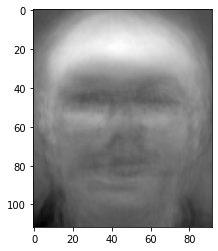

In [34]:
plt.imshow(eignvectors[:,0].reshape(112,92), cmap="gray")
print(np.dot(np.transpose(eignvectors[:,:k]),df.iloc[(s-1)*10 + i-1]['data']-mean).shape)

In [27]:
new_df = pd.DataFrame()
for s in range(1,41):
    for i in range(1,11):
        x = np.dot(np.transpose(eignvectors[:,:k]),(df.iloc[(s-1)*10 + i-1]['data']-mean))
        new_df = new_df.append({'data': x, 'label': s }, ignore_index=True)

In [28]:
new_test_data = new_df.iloc[::2]
new_train_data = new_df.iloc[1::2]

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(list(new_train_data['data']), list(new_train_data['label']))
print(knn.score( list(new_test_data['data']), list(new_test_data['label'])))
print(classification_report(list(new_test_data['label']), knn.predict( list(new_test_data['data']))))

0.945
              precision    recall  f1-score   support

         1.0       1.00      0.60      0.75         5
         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00         5
         4.0       1.00      1.00      1.00         5
         5.0       0.62      1.00      0.77         5
         6.0       1.00      1.00      1.00         5
         7.0       0.83      1.00      0.91         5
         8.0       1.00      1.00      1.00         5
         9.0       1.00      1.00      1.00         5
        10.0       1.00      0.80      0.89         5
        11.0       1.00      1.00      1.00         5
        12.0       1.00      1.00      1.00         5
        13.0       1.00      1.00      1.00         5
        14.0       1.00      1.00      1.00         5
        15.0       1.00      1.00      1.00         5
        16.0       0.83      1.00      0.91         5
        17.0       1.00      1.00      1.00         5
        18.0       1.

     acc  alpha
0  0.950   0.80
1  0.945   0.85
2  0.945   0.90
3  0.955   0.95


Text(0, 0.5, 'Accuracy')

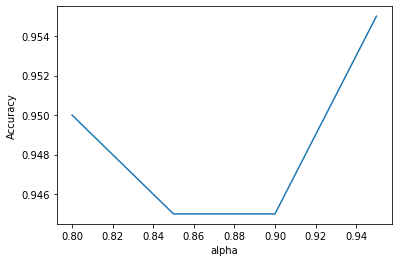

In [31]:
acc = pd.DataFrame()

n = 1

for alpha in np.arange(0.8,0.96,0.05):
    tot = 0
    k = 0
    while tot/sum(eignvalues) < alpha:
        tot += eignvalues[k]
        k += 1
    k

    x = (eignvectors[:,0])*z[10]
    for j in range(1,k):
        x += (eignvectors[:,j])*z[10]

    new_df = pd.DataFrame()
    for s in range(1,41):
        for i in range(1,11):
            x = np.dot(np.transpose(eignvectors[:,:k]),(df.iloc[(s-1)*10 + i-1]['data']-mean))
            new_df = new_df.append({'data': x, 'label': s }, ignore_index=True)


    new_test_data = new_df.iloc[::2]
    new_train_data = new_df.iloc[1::2]

    knn = KNeighborsClassifier(n_neighbors=1)

    knn.fit(list(new_train_data['data']), list(new_train_data['label']))
    ac  = knn.score( list(new_test_data['data']), list(new_test_data['label']))
    acc = acc.append({'acc': ac, 'alpha': alpha  }, ignore_index=True)
    
    
print(acc)

plt.plot(acc['alpha'],acc['acc']);
plt.xlabel('alpha')
plt.ylabel('Accuracy')

# Classification Using LDA

In [6]:
ui = []

for i in range(1,41):
    data = (train_data[train_data['label']==i]['data']).to_numpy()
    data = np.stack(data)
    ui.append(np.mean(data, axis=0))
    
data = (train_data['data']).to_numpy()
data = np.stack(data)
u = np.mean(data, axis=0)

In [11]:
sb = 5 * np.outer((ui[0] - u) , (ui[0] - u ))
for i in range (1,40):
    sb += 5 * np.outer((ui[i] - u) , (ui[i] - u ))

In [12]:
data = (train_data[train_data['label']==1]['data']).to_numpy()
data = np.stack(data)
z =  data - ui[0]

for i in range(2,41):
    data = (train_data[train_data['label']==i]['data']).to_numpy()
    data = np.stack(data)
    z =  np.append(z, data - ui[i-1],axis = 0)

In [13]:
print(z.shape)
print(z[0:5].shape)

(200, 10304)
(5, 10304)


In [14]:
s = np.dot(np.transpose(z[0:5]),z[0:5])

for i in range(2,41):
    s += np.dot(np.transpose(z[(i-1)*5:i*5]),z[(i-1)*5:i*5])
    
si = np.linalg.inv(s)
sib = np.dot(si,sb)

In [15]:
eignvalues1,eignvectors1 = np.linalg.eigh(sib)
eignvalues1

array([-1.42068291e+20, -3.64003581e+19, -2.21824612e+19, ...,
        2.23592275e+19,  3.67166306e+19,  1.41927739e+20])

In [16]:
idx = eignvalues1.argsort()[::-1]
eignvalues1 = eignvalues1[idx]
eignvectors1 = eignvectors1[:,idx]
eignvalues1

array([ 1.41927739e+20,  3.67166306e+19,  2.23592275e+19, ...,
       -2.21824612e+19, -3.64003581e+19, -1.42068291e+20])

In [17]:
u = eignvectors1[:,:39]

In [18]:
new_df = pd.DataFrame()
for s in range(1,41):
    for i in range(1,11):
        x = np.dot(np.transpose(u),df['data'].iloc[(s-1)*10 + i-1])
        new_df = new_df.append({'data': x, 'label': s }, ignore_index=True)

print(new_df.iloc[10]['data'].shape)

(39,)


In [19]:
new_test_data = new_df.iloc[::2]
new_train_data = new_df.iloc[1::2]

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(list(new_train_data['data']), list(new_train_data['label']))
print(knn.score( list(new_test_data['data']), list(new_test_data['label'])))
print(classification_report(list(new_test_data['label']), knn.predict( list(new_test_data['data']))))

0.95
              precision    recall  f1-score   support

         1.0       1.00      0.80      0.89         5
         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00         5
         4.0       0.83      1.00      0.91         5
         5.0       1.00      1.00      1.00         5
         6.0       1.00      1.00      1.00         5
         7.0       0.71      1.00      0.83         5
         8.0       1.00      1.00      1.00         5
         9.0       1.00      1.00      1.00         5
        10.0       1.00      1.00      1.00         5
        11.0       1.00      1.00      1.00         5
        12.0       1.00      1.00      1.00         5
        13.0       0.83      1.00      0.91         5
        14.0       1.00      1.00      1.00         5
        15.0       0.83      1.00      0.91         5
        16.0       1.00      1.00      1.00         5
        17.0       1.00      1.00      1.00         5
        18.0       0.8

# Classifier Tuning

In [ ]:
df = pd.DataFrame()
for s in range(1,41):
    for i in range(1,11):
        img = PIL.Image.open("/kaggle/input//att-database-of-faces/s{}/{}.pgm".format(s,i))
        img = img.getdata()
        img = np.array(img)
        df = df.append({'data': img, 'label': s }, ignore_index=True)
        # print(img)
df['label'] = (df['label']).apply(np.int64)
test_data = df.iloc[::2]
train_data = df.iloc[1::2]

tune PCA

In [ ]:
data = test_data["data"].to_numpy()
data = np.stack(data)
data.shape
mean =np.mean(data,axis=0)
z = data - mean
cov = (np.dot(np.transpose(z),z)/199)
cov
eignvalues,eignvectors = np.linalg.eigh(cov)
eignvalues
eignvalues = np.flip(eignvalues)
eignvectors = np.flip(eignvectors,axis=1)

In [32]:
alpha = 0.9

tot = 0
k = 0
while tot/sum(eignvalues) < alpha:
    tot += eignvalues[k]
    k += 1
k

x = (eignvectors[:,0])*z[10]
for j in range(1,k):
    x += (eignvectors[:,j])*z[10]

new_df = pd.DataFrame()
for s in range(1,41):
    for i in range(1,11):
        x = np.dot(np.transpose(eignvectors[:,:k]),(df.iloc[(s-1)*10 + i-1]['data']-mean))
        new_df = new_df.append({'data': x, 'label': s }, ignore_index=True)


    new_test_data = new_df.iloc[::2]
    new_train_data = new_df.iloc[1::2]


     acc    n
0  0.945  1.0
1  0.870  3.0
2  0.825  5.0
3  0.785  7.0


Text(0, 0.5, 'Accuracy')

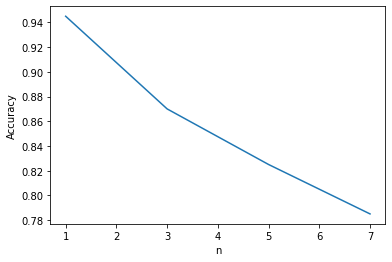

In [33]:
acc = pd.DataFrame()

for n in range (1,9,2):

    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(list(new_train_data['data']), list(new_train_data['label']))
    ac  = knn.score( list(new_test_data['data']), list(new_test_data['label']))
    acc = acc.append({'acc': ac, 'n': n  }, ignore_index=True)
print(acc)

plt.plot(acc['n'],acc['acc']);
plt.xlabel('n')
plt.ylabel('Accuracy')

tune LDA

In [24]:
ui = []

for i in range(1,41):
    data = (train_data[train_data['label']==i]['data']).to_numpy()
    data = np.stack(data)
    ui.append(np.mean(data, axis=0))
    
data = (train_data['data']).to_numpy()
data = np.stack(data)
u = np.mean(data, axis=0)
sb = 5 * np.outer((ui[0] - u) , (ui[0] - u ))
for i in range (1,40):
    sb += 5 * np.outer((ui[i] - u) , (ui[i] - u ))
    
data = (train_data[train_data['label']==1]['data']).to_numpy()
data = np.stack(data)
z =  data - ui[0]

for i in range(2,41):
    data = (train_data[train_data['label']==i]['data']).to_numpy()
    data = np.stack(data)
    z =  np.append(z, data - ui[i-1],axis = 0)
    
s = np.dot(np.transpose(z[0:5]),z[0:5])

for i in range(2,41):
    s += np.dot(np.transpose(z[(i-1)*5:i*5]),z[(i-1)*5:i*5])
    
si = np.linalg.inv(s)
sib = np.dot(si,sb)

eignvalues1,eignvectors1 = np.linalg.eigh(sib)
eignvalues1 = np.flip(eignvalues1)
eignvectors1 = np.flip(eignvectors1,axis=1)
u = eignvectors1[:,:39]
new_df = pd.DataFrame()
for s in range(1,41):
    for i in range(1,11):
        x = np.dot(np.transpose(u),df['data'].iloc[(s-1)*10 + i-1])
        new_df = new_df.append({'data': x, 'label': s }, ignore_index=True)
        
new_test_data = new_df.iloc[::2]
new_train_data = new_df.iloc[1::2]


    acc    n
0  0.95  1.0
1  0.84  3.0
2  0.79  5.0
3  0.73  7.0


Text(0, 0.5, 'Accuracy')

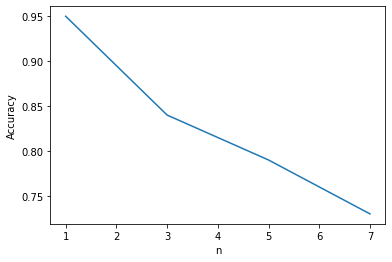

In [25]:
acc = pd.DataFrame()
for n in range (1,9,2):
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(list(new_train_data['data']), list(new_train_data['label']))
    ac = (knn.score( list(new_test_data['data']), list(new_test_data['label'])))
    acc = acc.append({'acc': ac, 'n': n  }, ignore_index=True)
print(acc)

plt.plot(acc['n'],acc['acc']);
plt.xlabel('n')
plt.ylabel('Accuracy')

# Compare vs Non-Face Images

In [54]:
df2 = pd.DataFrame()
for s in range(1,41):
    for i in range(1,11):
        img = PIL.Image.open("/kaggle/input//att-database-of-faces/s{}/{}.pgm".format(s,i))
        img = img.getdata()
        img = np.array(img)
        df2 = df2.append({'data': img, 'label': 0 }, ignore_index=True)
        # print(img)
df2['label'] = (df2['label']).apply(np.int64)

In [55]:
n_nonfaces = 400

for i in range(n_nonfaces):
    img = PIL.Image.open("../input/scene-classification/train-scene classification/train/{}.jpg".format(i))
    img = ImageOps.grayscale(img)
    img = img.resize((92,112), Image.ANTIALIAS)
    img = img.getdata()
    img = np.array(img)
    df2 = df2.append({'data': img, 'label': 1 }, ignore_index=True)

                                                  data  label
0    [48, 49, 45, 47, 49, 57, 39, 42, 53, 49, 53, 6...      0
1    [60, 60, 62, 53, 48, 51, 61, 60, 71, 68, 78, 7...      0
2    [39, 44, 53, 37, 61, 48, 61, 45, 35, 40, 40, 3...      0
3    [63, 53, 35, 36, 33, 34, 31, 35, 39, 43, 56, 7...      0
4    [64, 76, 80, 53, 34, 72, 60, 66, 66, 50, 47, 4...      0
..                                                 ...    ...
795  [244, 244, 244, 244, 244, 244, 244, 244, 244, ...      1
796  [169, 167, 166, 165, 166, 165, 164, 164, 164, ...      1
797  [124, 126, 128, 127, 126, 125, 126, 127, 127, ...      1
798  [66, 61, 71, 75, 73, 65, 69, 69, 68, 75, 78, 7...      1
799  [209, 209, 205, 201, 200, 207, 219, 227, 216, ...      1

[800 rows x 2 columns]


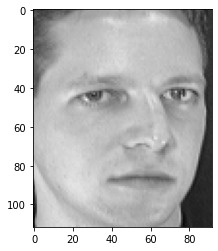

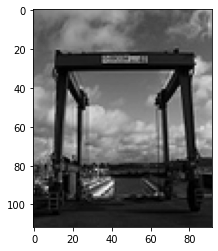

In [56]:
print(df2)
plt.imshow(df2.iloc[1]['data'].reshape(112,92), cmap="gray")
plt.show()
plt.imshow(df2.iloc[401]['data'].reshape(112,92), cmap="gray")
plt.show()

In [57]:
print(df2['label'].value_counts())

0    400
1    400
Name: label, dtype: int64


In [58]:
test_data2 = df2.iloc[::2]
test_data2 = test_data2.sample(frac=1,random_state=1)

train_data2 = df2.iloc[1::2]
train_data2 = train_data2.sample(frac=1,random_state=1)

PCA

In [47]:
data = test_data2["data"].to_numpy()
data = np.stack(data)
data.shape
mean =np.mean(data,axis=0)
z = data - mean
cov = (np.dot(np.transpose(z),z)/(199+n_nonfaces))
cov
eignvalues,eignvectors = np.linalg.eigh(cov)
eignvalues
eignvalues = np.flip(eignvalues)
eignvectors = np.flip(eignvectors,axis=1)

In [48]:
alpha = 0.9

tot = 0
k = 0
while tot/sum(eignvalues) < alpha:
    tot += eignvalues[k]
    k += 1
k

new_df = pd.DataFrame()
for s in range(1,41):
    for i in range(1,11):
        x = np.dot(np.transpose(eignvectors[:,:k]),df2.iloc[(s-1)*10 + i-1]['data']-mean)
        new_df = new_df.append({'data': x, 'label': 0 }, ignore_index=True)
for s in range(400,n_nonfaces+400):
    x = np.dot(np.transpose(eignvectors[:,:k]),df2.iloc[s]['data']-mean)
    new_df = new_df.append({'data': x, 'label': 1 }, ignore_index=True)
    
    new_test_data = new_df.iloc[::2]
    new_test_data = new_test_data.sample(frac=1,random_state=1)
    new_train_data = new_df.iloc[1::2]
    new_train_data = new_train_data.sample(frac=1,random_state=1)

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       200
         1.0       1.00      0.78      0.88        50

    accuracy                           0.96       250
   macro avg       0.97      0.89      0.92       250
weighted avg       0.96      0.96      0.95       250

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       200
         1.0       1.00      0.78      0.88        50

    accuracy                           0.96       250
   macro avg       0.97      0.89      0.92       250
weighted avg       0.96      0.96      0.95       250

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       200
         1.0       1.00      0.78      0.88        50

    accuracy                           0.96       250
   macro avg       0.97      0.89      0.92       250
weighted avg       0.96      0.96      0.95       250

              preci

Text(0, 0.5, 'Accuracy')

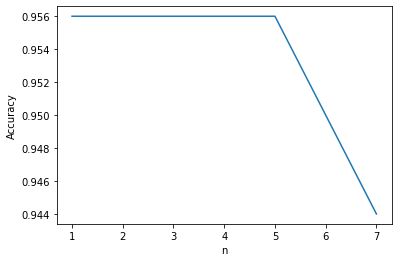

In [49]:
acc = pd.DataFrame()

for n in range (1,9,2):

    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(list(new_train_data['data']), list(new_train_data['label']))
    ac  = knn.score( list(new_test_data['data']), list(new_test_data['label']))
    acc = acc.append({'acc': ac, 'n': n  }, ignore_index=True)
    print(classification_report(list(new_test_data['label']), knn.predict( list(new_test_data['data']))))
print(acc)

plt.plot(acc['n'],acc['acc']);
plt.xlabel('n')
plt.ylabel('Accuracy')

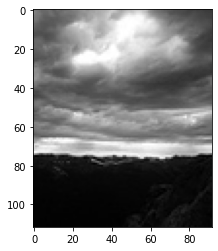

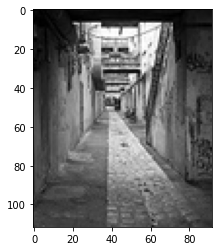

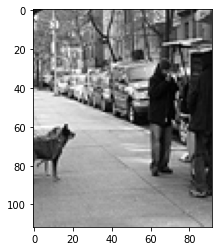

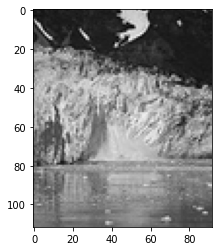

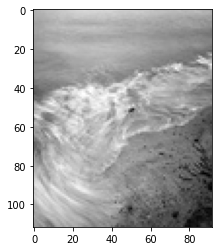

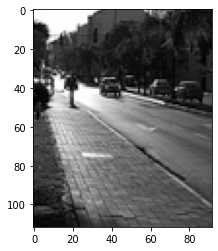

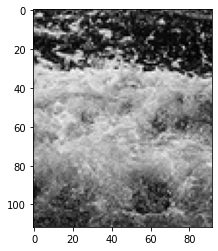

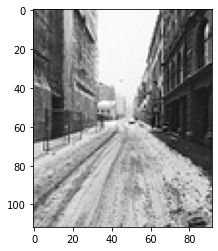

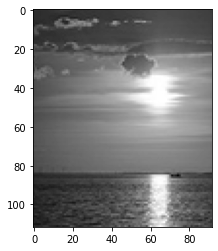

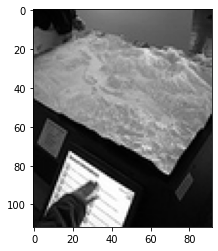

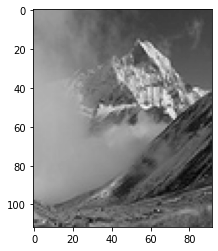

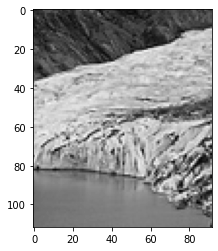

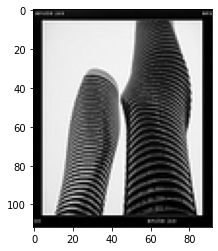

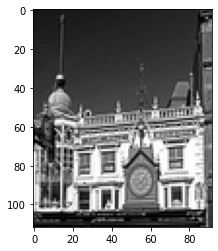

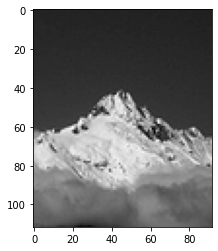

0


In [68]:
pred = knn.predict(list(new_test_data['data']))
q = 0
for i in range(len(pred)):
    if pred[i]!=new_test_data.iloc[i]['label']:
        plt.imshow(df2.iloc[new_test_data.index[i]]['data'].reshape(112,92), cmap="gray")
        plt.show()
print(q)

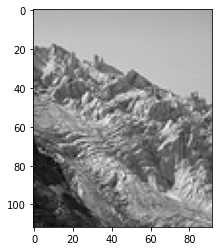

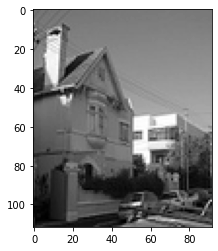

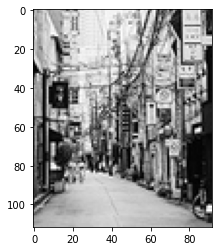

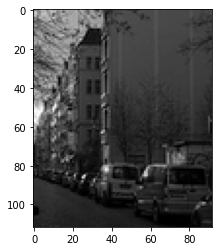

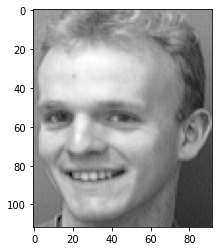

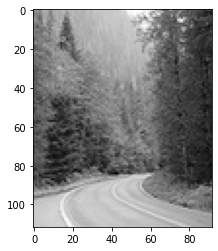

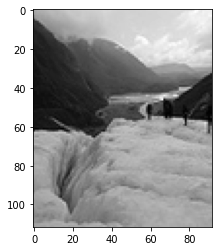

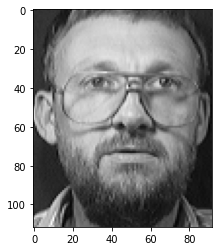

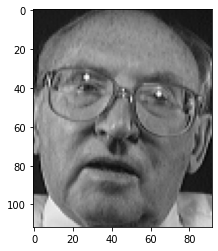

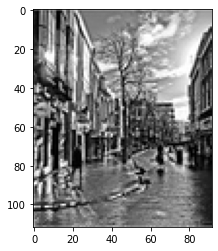

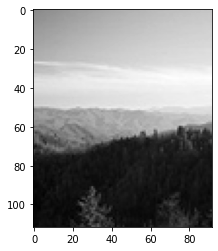

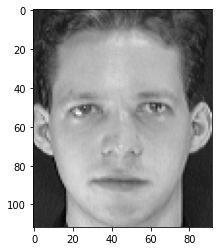

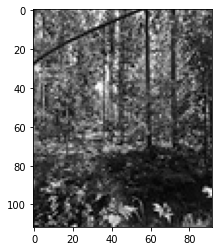

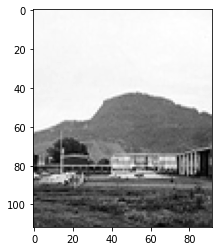

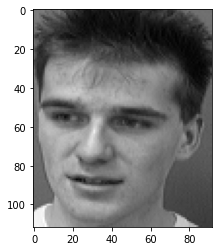

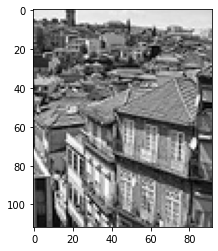

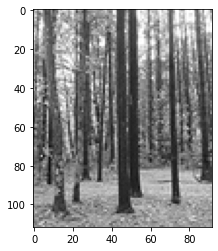

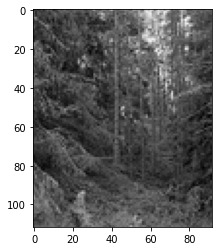

0


In [69]:
pred = knn.predict(list(new_test_data['data']))
q = 0
for i in range(20):
    if pred[i]==new_test_data.iloc[i]['label']:
        plt.imshow(df2.iloc[new_test_data.index[i]]['data'].reshape(112,92), cmap="gray")
        plt.show()
print(q)

Text(0, 0.5, 'Accuracy')

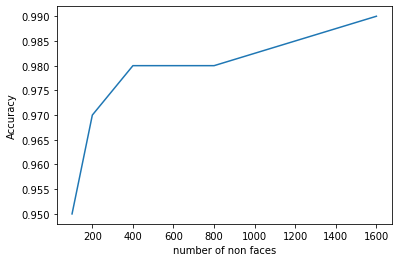

In [52]:
# plot number of non faces vs acc
plt.plot([100,200,400,800,1600],[0.95,0.97,0.98,0.98,0.99]);
plt.xlabel('number of non faces')
plt.ylabel('Accuracy')

LDA

In [60]:
ui = []

for i in range(2):
    data = (train_data2[train_data2['label']==i]['data']).to_numpy()
    data = np.stack(data)
    ui.append(np.mean(data, axis=0))
    
data = (train_data2['data']).to_numpy()
data = np.stack(data)
# u = np.mean(data, axis=0)
b = np.outer((ui[0] - ui[1]) , (ui[0] - ui[1] ))

    
data = (train_data2[train_data2['label']==0]['data']).to_numpy()
data = np.stack(data)
z0 =  data - ui[0]

data = (train_data2[train_data2['label']==1]['data']).to_numpy()
data = np.stack(data)
z1 =  data - ui[1]

s = np.dot(np.transpose(z0),z1)

si = np.linalg.inv(s)
sib = np.dot(si,b)

(10304, 10304)

In [61]:
ui = []

for i in range(2):
    data = (train_data2[train_data2['label']==i]['data']).to_numpy()
    data = np.stack(data)
    ui.append(np.mean(data, axis=0))
    
data = (train_data2['data']).to_numpy()
data = np.stack(data)
b = np.outer((ui[0] - ui[1]) , (ui[0] - ui[1] ))

    
data = (train_data2[train_data2['label']==0]['data']).to_numpy()
data = np.stack(data)
z0 =  data - ui[0]

data = (train_data2[train_data2['label']==0]['data']).to_numpy()
data = np.stack(data)
z1 =  data - ui[1]

s = np.dot(np.transpose(z0),z1)
si = np.linalg.inv(s)
sib = np.dot(si,b)

eignvalues1,eignvectors1 = np.linalg.eigh(sib)
eignvalues1 = np.flip(eignvalues1)
eignvectors1 = np.flip(eignvectors1,axis=1)

In [62]:
#for only 1 eign vector
u = eignvectors1[:,0]
n = 1
acc = pd.DataFrame()

new_df = pd.DataFrame()
for i in range(400):
    x = np.dot(np.transpose(u),df2['data'].iloc[i])
    new_df = new_df.append({'data': x, 'label': 0 }, ignore_index=True)
for i in range(400,400+n_nonfaces):
    x = np.dot(np.transpose(u),df2['data'].iloc[i])
    new_df = new_df.append({'data': x, 'label': 1 }, ignore_index=True)
        
new_test_data = new_df.iloc[::2]
new_train_data = new_df.iloc[1::2]
new_test_data


knn = KNeighborsClassifier(n_neighbors=n)

knn.fit(np.array(new_train_data['data']).reshape(-1, 1), list(new_train_data['label']))
ac = (knn.score(np.array(new_test_data['data']).reshape(-1, 1), list(new_test_data['label'])))
acc = acc.append({'acc': ac, 'n': 1  }, ignore_index=True)


       acc     n
0   0.8125   1.0
1   0.6475   2.0
2   0.8725   3.0
3   0.9425   4.0
4   0.9650   5.0
5   0.9625   6.0
6   0.9625   7.0
7   0.9700   8.0
8   0.9750   9.0
9   0.9700  10.0
10  0.9700  11.0
11  0.9725  12.0
12  0.9700  13.0
13  0.9750  14.0
14  0.9775  15.0
15  0.9775  16.0
16  0.9750  17.0
17  0.9750  18.0
18  0.9775  19.0
19  0.9800  20.0
20  0.9800  21.0
21  0.9800  22.0
22  0.9800  23.0
23  0.9800  24.0
24  0.9775  25.0
25  0.9750  26.0
26  0.9775  27.0
27  0.9775  28.0
28  0.9750  29.0
29  0.9775  30.0
30  0.9750  31.0
31  0.9750  32.0
32  0.9750  33.0
33  0.9750  34.0
34  0.9775  35.0
35  0.9800  36.0
36  0.9800  37.0
37  0.9775  38.0
38  0.9800  39.0


Text(0, 0.5, 'acc')

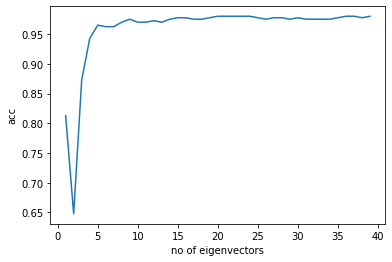

In [63]:
#try different eign vectors
#acc = pd.DataFrame()

for j in range(1,39):
    u = eignvectors[:,:j]
    new_df = pd.DataFrame()
    for i in range(400):
        x = np.dot(np.transpose(u),df2['data'].iloc[i])
        new_df = new_df.append({'data': x, 'label': 0 }, ignore_index=True)
    for i in range(400,400+n_nonfaces):
        x = np.dot(np.transpose(u),df2['data'].iloc[i])
        new_df = new_df.append({'data': x, 'label': 1 }, ignore_index=True)

    new_test_data = new_df.iloc[::2]
    new_train_data = new_df.iloc[1::2]
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(list(new_train_data['data']), list(new_train_data['label']))
    ac = (knn.score(list(new_test_data['data']), list(new_test_data['label'])))
    acc = acc.append({'acc': ac, 'n': j+1  }, ignore_index=True)
print(acc)
plt.plot(acc['n'],acc['acc']);
plt.xlabel('no of eigenvectors')
plt.ylabel('acc')

      acc    n
0  0.9800  1.0
1  0.9775  3.0
2  0.9650  5.0
3  0.9700  7.0


Text(0, 0.5, 'Accuracy')

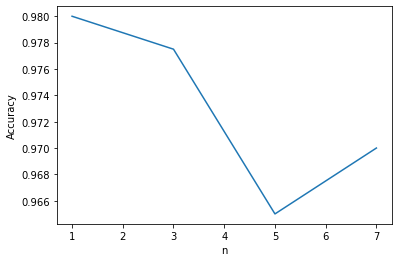

In [64]:
u = eignvectors[:,:14]
new_df = pd.DataFrame()
for i in range(400):
    x = np.dot(np.transpose(u),df2['data'].iloc[i])
    new_df = new_df.append({'data': x, 'label': 0 }, ignore_index=True)
for i in range(400,400+n_nonfaces):
    x = np.dot(np.transpose(u),df2['data'].iloc[i])
    new_df = new_df.append({'data': x, 'label': 1 }, ignore_index=True)

acc = pd.DataFrame()
for n in range (1,9,2):
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(list(new_train_data['data']), list(new_train_data['label']))
    ac = (knn.score(list(new_test_data['data']), list(new_test_data['label'])))
    acc = acc.append({'acc': ac, 'n': n  }, ignore_index=True)
print(acc)

plt.plot(acc['n'],acc['acc']);
plt.xlabel('n')
plt.ylabel('Accuracy')

      acc    n
0  0.6475  1.0
1  0.6800  3.0
2  0.6875  5.0
3  0.6825  7.0


Text(0, 0.5, 'Accuracy')

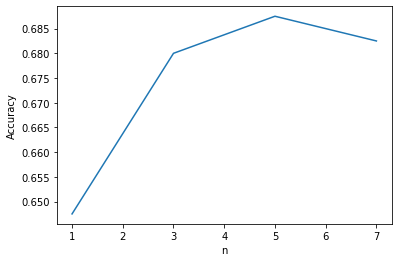

In [65]:
# #for only 1 eign vector
u = eignvectors[:,0]

new_df = pd.DataFrame()
for i in range(400):
    x = np.dot(np.transpose(u),df2['data'].iloc[i])
    new_df = new_df.append({'data': x, 'label': 0 }, ignore_index=True)
for i in range(400,400+n_nonfaces):
    x = np.dot(np.transpose(u),df2['data'].iloc[i])
    new_df = new_df.append({'data': x, 'label': 1 }, ignore_index=True)
        
new_test_data = new_df.iloc[::2]
new_train_data = new_df.iloc[1::2]
new_test_data


acc = pd.DataFrame()
for n in range (1,9,2):
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(np.array(new_train_data['data']).reshape(-1, 1), list(new_train_data['label']))
    ac = (knn.score(np.array(new_test_data['data']).reshape(-1, 1), list(new_test_data['label'])))
    acc = acc.append({'acc': ac, 'n': n  }, ignore_index=True)
print(acc)

plt.plot(acc['n'],acc['acc']);
plt.xlabel('n')
plt.ylabel('Accuracy')

# Bonus

In [66]:
df = pd.DataFrame()
for s in range(1,41):
    for i in range(1,11):
        img = PIL.Image.open("/kaggle/input//att-database-of-faces/s{}/{}.pgm".format(s,i))
        img = img.getdata()
        img = np.array(img)
        df = df.append({'data': img, 'label': s }, ignore_index=True)
        # print(img)
df['label'] = (df['label']).apply(np.int64)

In [67]:
X_train, X_val, y_train, y_val = train_test_split(df['data'], df['label'], test_size=0.3, stratify=df['label'],random_state=1)


In [68]:
y_val.value_counts()

32    3
19    3
29    3
1     3
10    3
25    3
2     3
28    3
26    3
27    3
15    3
20    3
30    3
12    3
21    3
35    3
38    3
23    3
40    3
9     3
3     3
11    3
36    3
14    3
8     3
22    3
31    3
16    3
18    3
37    3
24    3
6     3
4     3
17    3
5     3
7     3
39    3
13    3
34    3
33    3
Name: label, dtype: int64

PCA

In [52]:
data = X_train.to_numpy()
data = np.stack(data)
data.shape
mean =np.mean(data,axis=0)
z = data - mean
cov = (np.dot(np.transpose(z),z)/199)
cov
eignvalues,eignvectors = np.linalg.eigh(cov)
eignvalues
eignvalues = np.flip(eignvalues)
eignvectors = np.flip(eignvectors,axis=1)

In [53]:
alpha = 0.9

tot = 0
k = 0
while tot/sum(eignvalues) < alpha:
    tot += eignvalues[k]
    k += 1
k

x = (eignvectors[:,0])*z[10]
for j in range(1,k):
    x += (eignvectors[:,j])*z[10]

new_df = pd.DataFrame()
for s in range(1,41):
    for i in range(1,11):
        x = np.dot(np.transpose(eignvectors[:,:k]),df.iloc[(s-1)*10 + i-1]['data']-mean)
        x = np.array(x)
        new_df = new_df.append({'data': x, 'label': s }, ignore_index=True)


In [54]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(new_df['data'], new_df['label'], test_size=0.3, stratify=new_df['label'],random_state=1)

        acc    n
0  0.966667  1.0
1  0.925000  3.0
2  0.883333  5.0
3  0.866667  7.0


Text(0, 0.5, 'Accuracy')

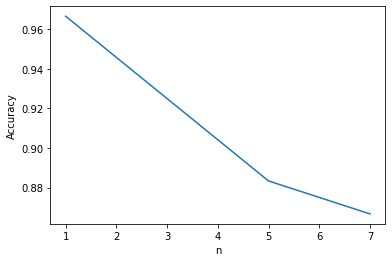

In [55]:
acc = pd.DataFrame()

for n in range (1,9,2):

    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(list(X_train1), list(y_train1))
    ac  = knn.score( list(X_val1), list(y_val1))
    acc = acc.append({'acc': ac, 'n': n  }, ignore_index=True)
print(acc)

plt.plot(acc['n'],acc['acc']);
plt.xlabel('n')
plt.ylabel('Accuracy')

LDA

In [69]:
X_train, X_val, y_train, y_val = train_test_split(df['data'], df['label'], test_size=0.3, stratify=df['label'],random_state=1)
train_data = pd.DataFrame()
for i in range(len(X_train)):
    train_data = train_data.append({'data': X_train.iloc[i], 'label': y_train.iloc[i] }, ignore_index=True)

In [70]:
ui = []

for i in range(1,41):
    data = (train_data[train_data['label']==i]['data']).to_numpy()
    data = np.stack(data)
    ui.append(np.mean(data, axis=0))
    
data = (train_data['data']).to_numpy()
data = np.stack(data)
u = np.mean(data, axis=0)
sb = 5 * np.outer((ui[0] - u) , (ui[0] - u ))
for i in range (1,40):
    sb += 5 * np.outer((ui[i] - u) , (ui[i] - u ))
    
data = (train_data[train_data['label']==1]['data']).to_numpy()
data = np.stack(data)
z =  data - ui[0]

for i in range(2,41):
    data = (train_data[train_data['label']==i]['data']).to_numpy()
    data = np.stack(data)
    z =  np.append(z, data - ui[i-1],axis = 0)
    
s = np.dot(np.transpose(z[0:5]),z[0:5])

for i in range(2,41):
    s += np.dot(np.transpose(z[(i-1)*5:i*5]),z[(i-1)*5:i*5])
    
si = np.linalg.inv(s)
sib = np.dot(si,sb)

eignvalues1,eignvectors1 = np.linalg.eigh(sib)
eignvalues1 = np.flip(eignvalues1)
eignvectors1 = np.flip(eignvectors1,axis=1)
u = eignvectors1[:,:39]
new_df = pd.DataFrame()
for s in range(1,41):
    for i in range(1,11):
        x = np.dot(np.transpose(u),df['data'].iloc[(s-1)*10 + i-1])
        new_df = new_df.append({'data': x, 'label': s }, ignore_index=True)


In [71]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(new_df['data'], new_df['label'], test_size=0.3, stratify=new_df['label'],random_state=1)

        acc    n
0  0.975000  1.0
1  0.975000  3.0
2  0.925000  5.0
3  0.866667  7.0


Text(0, 0.5, 'Accuracy')

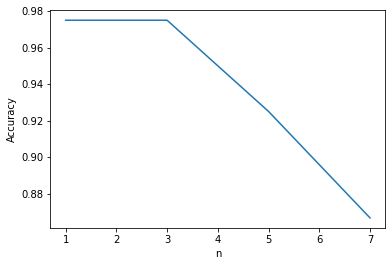

In [72]:
acc = pd.DataFrame()
for n in range (1,9,2):
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(list(X_train1), list(y_train1))
    ac  = knn.score( list(X_val1), list(y_val1))
    acc = acc.append({'acc': ac, 'n': n  }, ignore_index=True)
print(acc)

plt.plot(acc['n'],acc['acc']);
plt.xlabel('n')
plt.ylabel('Accuracy')